In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle
from scipy import signal

In [2]:
import h5py
filename = 'data/SNOLAB_sims.h5'
#remove vars
f = h5py.File(filename,'r')

#save the results for the Edw fit
path='{}/{}/'.format('SNOLAB','10x')

En = np.asarray(f[path+'En'])
print(np.shape(En))

f.close()

(18620,)


In [3]:
#make histos (counts per day)


ebins = np.linspace(0,5,100)
xcq = (ebins[:-1] + ebins[1:]) / 2
n,nx = np.histogram(En+0.764,bins=ebins)

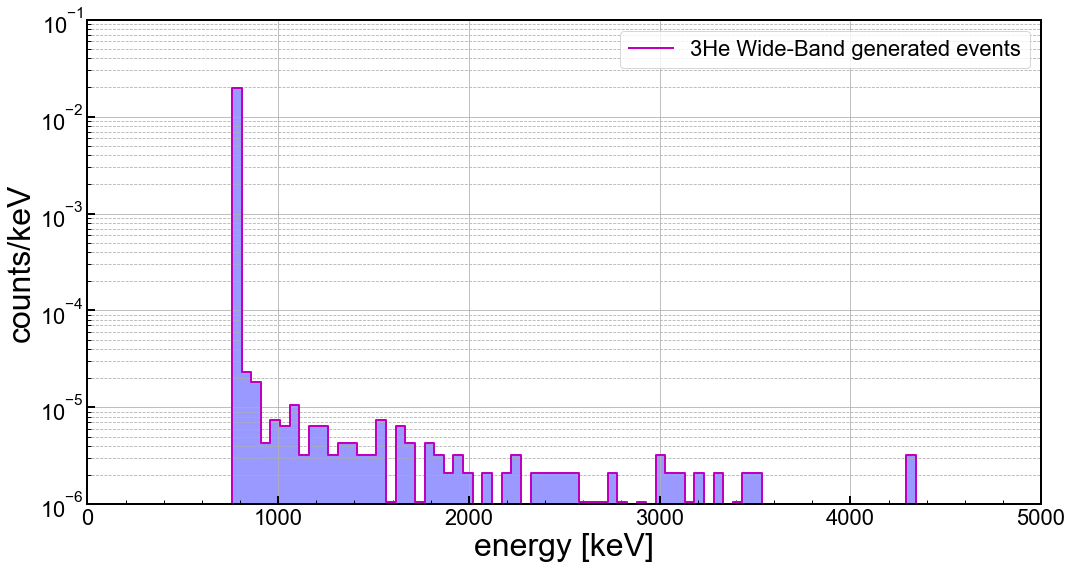

In [4]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes


thist = n/np.sum(n)/np.diff(xcq*1000)[0]


#print(estring)
ax1.step(xcq*1000,thist, where='mid',color='m', linestyle='-', \
            label='3He Wide-Band generated events', linewidth=2)


ymin = 1e-6
ymax = 1e-1

blue = '#118DFA'
ax1.fill_between(xcq*1000,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
                 label='')


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 5*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV]')
ax1.set_ylabel('counts/keV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()